In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# a) Import the data set

In [2]:
#import the dataset
df=pd.read_csv('Iris.csv')

In [3]:
#displaying the first 20 columns
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#remove column id cause it is not required
iris=df.drop(['Id'],axis=1)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
#shape of the dataset
print("Number of rows in dataset:{}".format(iris.shape[0]))
print("Number of columns in dataset:{}".format(iris.shape[1]))
iris.shape

Number of rows in dataset:150
Number of columns in dataset:5


(150, 5)

In [6]:
#finding out the different species and their quantities respectively
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
#checking for missing values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This shows that there are no missing values

In [8]:
#Describing the summary statistics of the dataframe
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


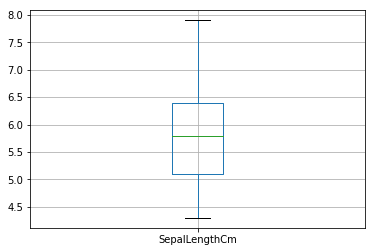

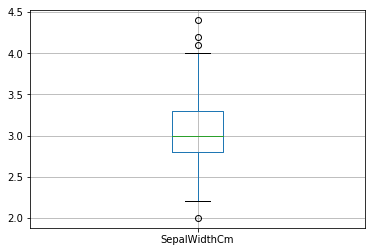

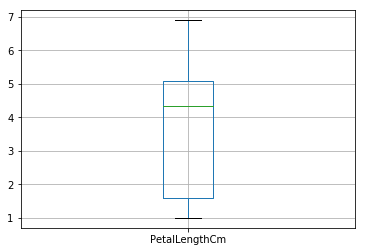

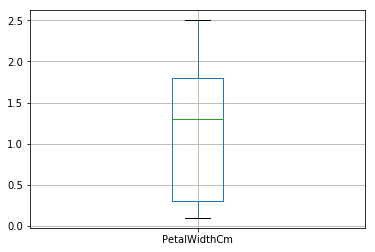

In [9]:
#Visually analysing the data via boxplot
col=iris.columns[0:4]
for column in col:
    plt.figure()
    iris.boxplot([column])


This shows that SepalWidthCm has a few outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F618174898>,
      dtype=object)

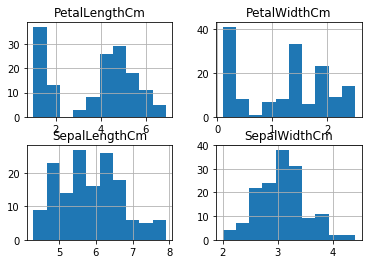

In [10]:
#analysing data via histogram
iris.hist()

# b) Store the split data into separate variables.

In [11]:
#Splitting the data into training and testing datasets respectively
X=iris.iloc[:,0:4]
Y=iris.iloc[:,4]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

# c)Creating a Naive Bayes Model on training dataset


In [12]:
#Creating a Naive Bayes model on the training set
clf=GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# d)Predicting the data model for testing dataset

In [13]:
#predicting the model for testing dataset
pred=clf.predict(X_test)
print(pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


In [14]:
Y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

In [15]:
#checking the accuracy of the model
clf.score(X_test,Y_test)

1.0

Text(0, 0.5, 'Y_test')

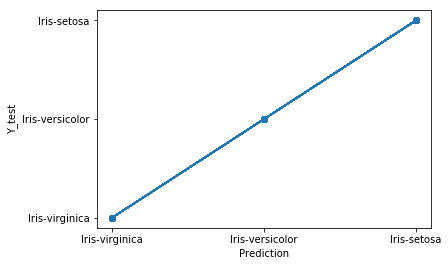

In [16]:
plt.scatter(pred,Y_test)
plt.plot(pred,Y_test)
plt.xlabel('Prediction')
plt.ylabel('Y_test')

This shows that the predicition is same as Y_test in the given dataset, hence the model has achieved 100% accuracy.

In [17]:
from sklearn import metrics
expected=Y_test[:]
print(metrics.classification_report(expected, pred))
print(metrics.confusion_matrix(expected, pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

      micro avg       1.00      1.00      1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
